# Class Description: Support Vector Machine (SVM) Analysis with Python
### Class Overview
This class will guide participants through the practical implementation and evaluation of Support Vector Machine (SVM) models using Python. Students will learn how to load and preprocess environmental data, train and validate SVM models, and visualize the results of their analyses. This hands-on session will utilize key Python libraries, including pandas, matplotlib, seaborn, and scikit-learn, to ensure a comprehensive understanding of the entire workflow.

### Learning Objectives
By the end of this class, participants will be able to:

* Load and preprocess time-series environmental data.
* Implement and train SVM models for classification tasks.
* Evaluate model performance using K-fold cross-validation.
* Visualize model results and learning curves.
* Perform hyperparameter tuning using Grid Search.
### Class Agenda
1. #### Introduction to SVM
* Brief overview of Support Vector Machines and their applications in data classification.

2. #### Data Loading and Preprocessing
* Loading environmental data from CSV files.
* Handling timestamps and extracting relevant date features.
* Identifying and removing outliers.
* Preparing data for SVM model input.

3. #### Implementing SVM Models
* Splitting the dataset into training and testing sets.
* Building a pipeline for data standardization and SVM model training.
* Training the SVM model and evaluating its accuracy.

4. #### K-fold Cross-Validation
* Understanding the concept of K-fold cross-validation.
* Implementing K-fold cross-validation to assess model performance.
* Interpreting cross-validation results.

5. #### Visualizing Model Results
* Creating scatter plots to compare predicted vs. observed values.
* Plotting learning curves to visualize training and validation accuracy.
* Analyzing the stability and performance of the model.

6. #### Hyperparameter Tuning with Grid Search
* Introduction to hyperparameter tuning.
* Setting up and performing Grid Search to find the best SVM parameters.
* Evaluating the results of Grid Search and selecting the optimal model.


In [9]:
import os
os.chdir ("/Users/taky/Library/CloudStorage/GoogleDrive-tahmid@udel.edu/Other computers/My Laptop/UDel/Fall 2023/MAST 638_Machine Learning/MAST638_HWs")

----------------------------------------------
       File Loading Report
----------------------------------------------
  total number: 16 file
         ./data/hw05/station-892077.csv
         ./data/hw05/station-892070.csv
         ./data/hw05/station-892071.csv
         ./data/hw05/station-091028.csv
         ./data/hw05/station-091015.csv
         ./data/hw05/station-091017.csv
         ./data/hw05/station-091002.csv
         ./data/hw05/station-091005.csv
         ./data/hw05/station-332064.csv
         ./data/hw05/station-091011.csv
         ./data/hw05/station-332068.csv
         ./data/hw05/station-091008.csv
         ./data/hw05/station-091023.csv
         ./data/hw05/station-091026.csv
         ./data/hw05/station-091030.csv
         ./data/hw05/station-892080.csv
Test Accuracy: 0.966
Fold:  1, Class dist.: [55 51 36], Acc: 0.875
Fold:  2, Class dist.: [55 51 36], Acc: 0.688
Fold:  3, Class dist.: [55 51 36], Acc: 0.812
Fold:  4, Class dist.: [55 51 36], Acc: 0.938
Fold:  5, 

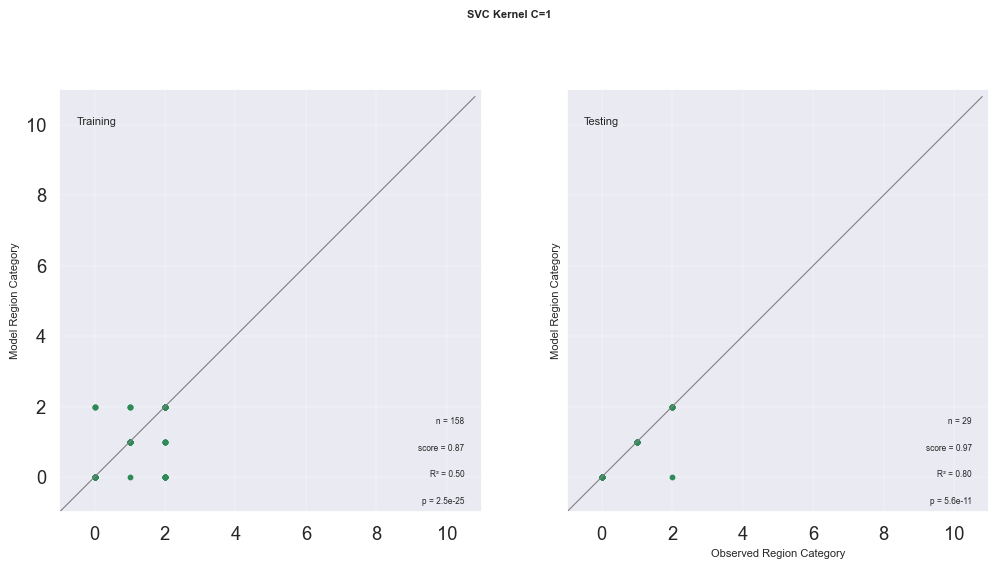

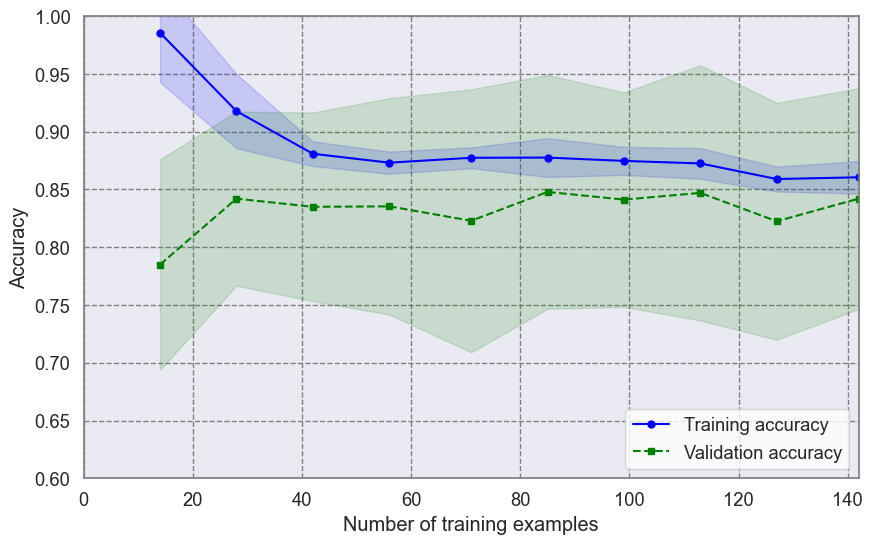

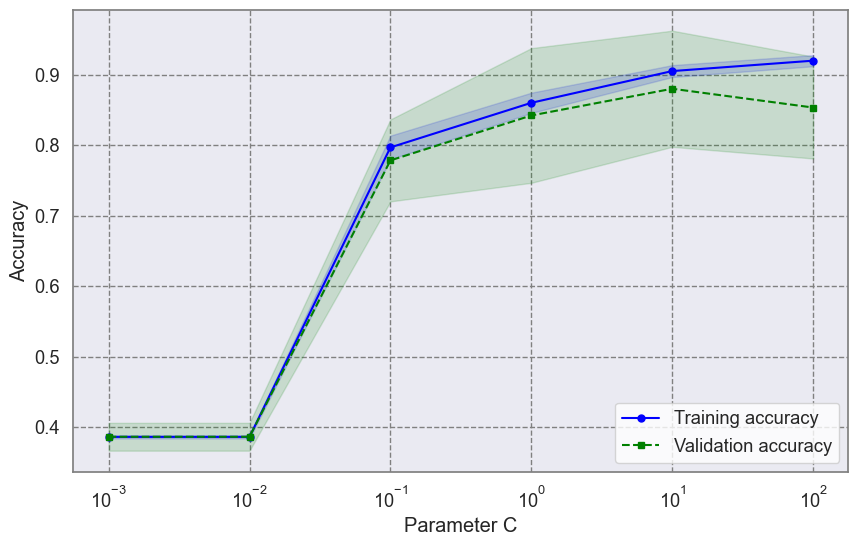

0.8920833333333332
{'svc__C': 1000.0, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}
aaaaa  2 [0.22223843 0.13399626]
Vector of weights (w) =  [0.22223843 0.13399626]
b =  -6.1957294013049395
Indices of support vectors =  [ 23  24  29  31 106 138  42  47  53  54  55]
Support vectors =  [[18.15       14.76      ]
 [13.7        17.18181818]
 [13.96470588 15.61413043]
 [14.98947368 14.23245614]
 [ 3.79090909 32.48780488]
 [16.85       13.70833333]
 [22.45263158 14.74626866]
 [14.1        29.85714286]
 [21.7875     16.12230216]
 [19.53809524 14.60668245]
 [21.51818182 14.3627451 ]]
Number of support vectors for each class =  [6 5]
aaaaa  2 [1.18300136 0.42184267]
Vector of weights (w) =  [1.18300136 0.42184267]
b =  -28.27532561883802
Indices of support vectors =  [23 47 54]
Support vectors =  [[18.15       14.76      ]
 [14.1        29.85714286]
 [19.53809524 14.60668245]]
Number of support vectors for each class =  [1 2]


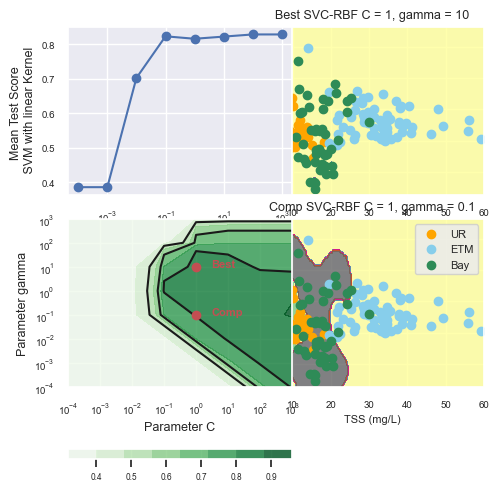

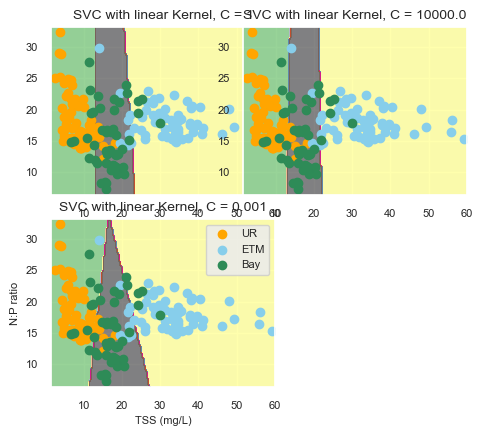

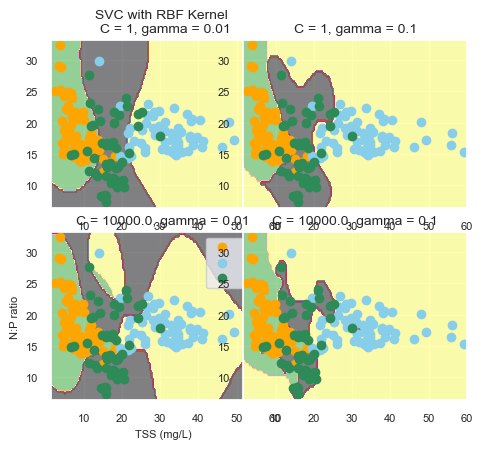

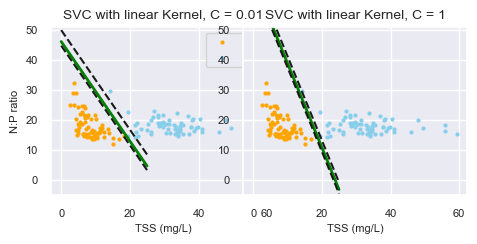

In [18]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
import datetime as dt
import glob
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr
from sklearn import svm, datasets
import seaborn as sns; sns.set(font_scale=1.2)
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

#####################
##  Global Params  ##
#####################

fdir = './data/hw05/'
list_UR = ['332064','332068','892070','892071','892077','892080']
list_ETM = ['091002','091005','091008','091011','091015','091017']
list_BA = ['091023','091026','091028','091030']
list_all = list_UR + list_ETM + list_BA
vnames = ['chlora_value','tss_value','phosphate_phosphorus_value','nutrient_nitrogen_value']

#-----------------------------------------
# Time related variables
#-----------------------------------------
months = np.arange(1,13,1)
#times = pd.date_range(start="20050101", end="20230101", freq='SM')[0::2]
#tappd = times; tappd = tappd.append(times); tappd = tappd.append(times);


#-----------------------------------------
# Outlier cutoff threshold
#-----------------------------------------
lb = 0.05; ub = 96; msplit = 0.15; nbins=10  # base
#-----------------------------------------
# others
#-----------------------------------------
colors = np.array(['orange', 'skyblue', 'seagreen'])
descs = np.array(['UR','ETM','Bay'])
fgx=0.05; fgw=0.35; fgdw=0.47
fgy=0.60; fgh=0.35; fgdh=0.48
fsize = 9

#################
##  load file  ##
#################


fnams = glob.glob(''.join([fdir,'station*.csv']))
print('----------------------------------------------')     
print('       File Loading Report')
print('----------------------------------------------')     
print('  total number:',len(fnams), 'file')
ifile = 0; df = pd.DataFrame()
for fnam in fnams:
  print('        ',fnam)  
  df_tmp = pd.read_csv(fnam)
  df_tmp['timestamp']=pd.to_datetime(df_tmp['timestamp']).dt.strftime('%Y-%m-%d')
  df_tmp['mday'] = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in df_tmp['timestamp']]
  df_tmp['month']= [dt.datetime.strptime(d,'%Y-%m-%d').month for d in df_tmp['timestamp']]
  df_tmp['year'] = [dt.datetime.strptime(d,'%Y-%m-%d').year for d in df_tmp['timestamp']]   
  #---------------------------
  # Station to Region
  #---------------------------
  #df_tmp['region'] = 0
  if fnam[-10:-4:1] in list_UR:
     df_tmp['region'] = 1; ireg = 1
  if fnam[-10:-4:1] in list_ETM:
     df_tmp['region'] = 2; ireg = 2
  if fnam[-10:-4:1] in list_BA:
     df_tmp['region'] = 3; ireg = 3
  #df = pd.concat([df,df_tmp])
  
  mwrk = pd.DataFrame(); mwrk.index = months;
  for vname in vnames:
    #----------------------------------------
    # remove outliers
    #----------------------------------------
    dfb = df_tmp.copy(deep=True);
    tmp = dfb[vname]
    dfb.loc[tmp>np.percentile(dfb.loc[tmp.notnull(), vname], ub),vname] = np.nan
    #print('      - ', dfb[vname].isnull().sum(), 'missing values in ',vname[:-6])
    del tmp

    #---------------------------------------------------
    # monthly binning: insert column with default values
    #---------------------------------------------------
    vnum = vname[:-5]+'num'
    mwrk[vnum] = 0
    mwrk[vname] = np.nan  
    for mnow in np.arange(1,13,1):
      tmp = dfb.loc[(dfb.month==mnow)
                  & (dfb[vname].notnull()),vname]      
      mwrk.loc[mnow:mnow,vnum ] = len(tmp)
      mwrk.loc[mnow:mnow,vname] = tmp.mean()      
    del tmp
  mwrk.loc[:,'region'] = ireg      
  
  df = pd.concat([df,mwrk])  
  ifile = ifile+1  
del ifile, df_tmp
df['N2P'] = np.divide(df['nutrient_nitrogen_value'],
                      df['phosphate_phosphorus_value'])


#-----------------------
# drop missing values
#-----------------------
mwrk = df.copy(deep=True)
mwrk = mwrk.dropna(axis=0)


########################
## Prepare Data Input ##
########################
tmp = mwrk.copy(deep=True)
# tmp = tmp[(mwrk.index>1) & (mwrk.index<12)]
X1 = tmp.tss_value.values
X2 = tmp.N2P.values
X = np.stack((X1,X2), axis = 1)
y = tmp.region.values-1


###################
## K-fold Method ##
###################
#-------------------------
# Build Pipeline
#-------------------------
X_train, X_test, Y_train, Y_test = train_test_split(
  X,          # features
  y,          # labels
  test_size = msplit, # split ratio
  random_state = 1,   # set random seed
  stratify = y)    # no randomize based on labels
#-------------------------
# Build Pipeline
#-------------------------
pipe_svc = make_pipeline(StandardScaler(),
                          SVC(random_state=1,C=1))
pipe_svc.fit(X_train, Y_train)
print('Test Accuracy: %.3f' % pipe_svc.score(X_test, Y_test))
#-------------------------
# K-fold Method
#-------------------------
kfold = StratifiedKFold(n_splits=nbins).split(X_train, Y_train)
scores = []
for k, (train, test) in enumerate(kfold):
    pipe_svc.fit(X_train[train], Y_train[train])
    score = pipe_svc.score(X_train[test], Y_train[test])
    scores.append(score)
    print('Fold: %2d, Class dist.: %s, Acc: %.3f' % (k+1,
          np.bincount(Y_train[train]), score))    
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

# Statistics
Yp_train = pipe_svc.predict(X_train)
Yp_test  = pipe_svc.predict(X_test)
Sc_train = pipe_svc.score(X_train,Y_train)
Sc_test  = pipe_svc.score(X_test,Y_test)




#-------------------------------------
# plot of results
#-------------------------------------
fgx = 0.05; fgw = 0.35; fgdw = 0.30
fgy = 0.60; fgh = 0.35; fgdh = 0.40
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
fig.suptitle('SVC Kernel C=1', fontsize=8, fontweight='bold')
ffig = './figures/HW6_fig1_SVC_splt' + str(int(msplit * 100))
mline = np.arange(-1, nbins + 1, 0.2)

for imodel, ax in zip([1, 2], axes):
    if imodel == 1:
        Y = Y_train; Yp = Yp_train; Sc = Sc_train; desc = 'Training'
    elif imodel == 2:
        Y = Y_test;  Yp = Yp_test; Sc = Sc_test;  desc = 'Testing'
    
    # More statistics
    cff = pearsonr(Y, Yp)
    R2 = cff[0] ** 2
    pval = cff[1]
    
    # Plot
    ax.scatter(Y, Yp, s=10, color='seagreen')
    ax.plot(mline, mline, '-', color='gray', linewidth=0.8)
    ax.grid(True, linewidth=0.25)
    ax.set_ylim(-1, nbins + 1)
    ax.set_yticks(np.arange(0, nbins + 1, 2))
    ax.set_xlim(-1, nbins + 1)
    ax.set_xticks(np.arange(0, nbins + 1, 2))
    ax.set_aspect('equal', adjustable='box')
    
    # Additional adjustments
    ax.text(-0.5, nbins, desc, fontsize=8, horizontalalignment='left')
    ax.text(nbins + 0.5, nbins / 20 * 3, 'n = %i' % len(Y), fontsize=6, horizontalalignment='right')
    ax.text(nbins + 0.5, nbins / 20 * 1.5, 'score = %.2f' % Sc, fontsize=6, horizontalalignment='right')
    ax.text(nbins + 0.5, nbins / 20 * 0, 'R\u00b2 = %.2f' % R2, fontsize=6, horizontalalignment='right')
    ax.text(nbins + 0.5, nbins / 20 * -1.5, 'p = %.1e' % pval, fontsize=6, horizontalalignment='right')
    
    if imodel == 1:
        ax.set_ylabel('Model Region Category', fontsize=8)
    elif imodel == 2:
        ax.set_xlabel('Observed Region Category', fontsize=8)
        ax.set_ylabel('Model Region Category', fontsize=8)

plt.savefig(ffig, bbox_inches="tight", dpi=300)
plt.show()


####################
## Learning Curve ##
####################
train_sizes, train_scores, test_scores = learning_curve(
    estimator=pipe_svc,
    X=X_train,
    y=Y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=nbins, n_jobs=1
)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot Learning Curve
ffig = './figures/HW6_fig2_learningCurve'
fig, ax = plt.subplots(figsize=(10, 6), facecolor='w')

ax.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
ax.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
ax.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
ax.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

ax.set_xlim(0, max(train_sizes))
ax.set_ylim(0.6, 1.0)
ax.set_xlabel('Number of training examples')
ax.set_ylabel('Accuracy')
ax.legend(loc='lower right', facecolor='w')
ax.grid(True, c='grey', linestyle='--')
ax.spines['bottom'].set_color('grey')
ax.spines['top'].set_color('grey')
ax.spines['right'].set_color('grey')
ax.spines['left'].set_color('grey')

plt.savefig(ffig, bbox_inches="tight", dpi=300)
plt.show()


######################
## Validation Curve ##
######################
ffig = './figures/HW6_fig3_ValidationCurve'
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(
    estimator=pipe_svc,
    X=X_train,
    y=Y_train,
    param_name='svc__C',
    param_range=param_range,
    cv=nbins
)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot Validation Curve
fig, ax = plt.subplots(figsize=(10, 6), facecolor='w')

ax.plot(param_range, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
ax.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
ax.plot(param_range, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
ax.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

ax.set_xscale('log')
ax.set_xlabel('Parameter C')
ax.set_ylabel('Accuracy')
ax.legend(loc='lower right', facecolor='w')
ax.grid(True, c='grey', linestyle='--')
ax.spines['bottom'].set_color('grey')
ax.spines['top'].set_color('grey')
ax.spines['right'].set_color('grey')
ax.spines['left'].set_color('grey')

plt.savefig(ffig, bbox_inches="tight", dpi=300)
plt.show()



#################
## Grid Search ##
#################
ffig = './figures/HW6_fig4_GridSearch'
pipe_svc = make_pipeline(StandardScaler(), SVC(random_state=1))
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [{'svc__C': param_range,
               'svc__kernel': ['linear']},
              {'svc__C': param_range,
               'svc__gamma': param_range,
               'svc__kernel': ['rbf']}]
gs = GridSearchCV(estimator=pipe_svc,param_grid=param_grid, 
                  scoring='accuracy',cv=nbins, refit=True, n_jobs=-1)
gs = gs.fit(X_train, Y_train)
print(gs.best_score_)
print(gs.best_params_)
# #--------------------------
# #  Model Results Comparison
# #--------------------------
Lscore = gs.cv_results_.get('mean_test_score')[:8]
LGscore = gs.cv_results_.get('mean_test_score')[8:].reshape((8,8))
xC = np.ones([8,8])
yg = np.ones([8,8])
for i in np.arange(0,8,1):
  for j in np.arange(0,8,1):
    xC[i,j] = param_range[i]
    yg[i,j] = param_range[j]
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1   # min and max for the 1st feature
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1   # min and max for the 2nd feature
h = (x_max / x_min)/100   # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), 
                     np.arange(y_min, y_max, h))  # make predictions for each of the points in xx,yy
fig = plt.figure(); 
#-----------------------------
# Example of SVM results
#-----------------------------
for iplt in [1,2]:
   if iplt==2:
      C=1; gamma = 0.1;  # SVM regularization parameter and gamma
      mtitle = 'Comp SVC-RBF C = '+str(C)+', gamma = '+str(gamma)
   elif iplt==1:
      C=1; gamma = 10;       
      mtitle = 'Best SVC-RBF C = '+str(C)+', gamma = '+str(gamma)
   
   # SVM kernel and Model configuration      
   clf = svm.SVC(kernel='rbf', gamma=gamma, C=C).fit(X, y)
   Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
   Z = Z.reshape(xx.shape)  
   
   # Results
   ax = fig.add_axes([fgx+fgdw,fgy-fgdh*(iplt-1),fgw,fgh])
   ax.tick_params(labelsize=fsize-2)
   plt.contourf(xx, yy, Z, cmap=plt.cm.Accent, alpha=0.8)  # draw the result using a color plot
   for color, i, target in zip(colors, [0, 1, 2], descs):
     plt.scatter(X[y==i, 0], X[y==i, 1], color=color, label=target)
   plt.title(mtitle,fontsize=fsize)
   plt.ylabel('N:P ratio',fontsize=fsize-2)  
   if iplt==2:
      plt.legend(loc='best', shadow=False, scatterpoints=1,fontsize=fsize-1)       
      plt.xlabel('TSS (mg/L)',fontsize=fsize-1)       
    
#-----------------------------
# Summary of GridSearch
#-----------------------------
# linear model
ax = fig.add_axes([fgx+fgdw*0,fgy-fgdh*0,fgw,fgh])   
ax.tick_params(labelsize=fsize-2)   
plt.plot(param_range,Lscore,'bo-',linewidth=1.5)
plt.xscale('log')
plt.xlabel('Parameter C',fontsize=fsize)
plt.ylabel('Mean Test Score \n SVM with linear Kernel',fontsize=fsize)

# RBF model
ax = fig.add_axes([fgx+fgdw*0,fgy-fgdh*1,fgw,fgh])
ax.tick_params(labelsize=fsize-2)
CS = ax.contourf(xC, yg, LGscore, cmap=plt.cm.Greens, alpha=0.8)
CS2 = ax.contour(CS, levels=CS.levels[::2], colors='k')
plt.plot(1,0.1,'ro',markersize=6)
plt.text(3,0.1,'Comp',fontsize=fsize-1,color='r',weight='bold')
plt.plot(1,10,'ro',markersize=6)
plt.text(3,10,'Best',fontsize=fsize-1,color='r',weight='bold')
#ax.clabel(CS2, fmt='%2.1f', colors='k', fontsize=fsize)
#ax.clabel(CS, inline=True, fontsize=10)
#fig.colorbar(CS, ax=ax, shrink=1.0,orientation="horizontal")
#plt.colorbar(orientation="horizontal",fraction=0.07,anchor=(1.0,0.0))
plt.xscale('log'); plt.xlabel('Parameter C',fontsize=fsize)
plt.yscale('log'); plt.ylabel('Parameter gamma',fontsize=fsize)

cbaxes = fig.add_axes([fgx, fgy-fgdh-0.15, fgw, 0.02]) 
cbaxes.tick_params(labelsize=fsize-3)
cb = plt.colorbar(CS, cax = cbaxes, orientation="horizontal")
cbaxes.set_xticks([0.4,0.5,0.6,0.7,0.8,0.9])

plt.savefig(ffig, bbox_inches="tight", dpi=300)
gs.cv_results_.get('params')[-30]
gs.cv_results_.get('mean_test_score')[-30]




 

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1   # min and max for the 1st feature
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1   # min and max for the 2nd feature
h = (x_max / x_min)/100   # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), 
                     np.arange(y_min, y_max, h))  # make predictions for each of the points in xx,yy
#--------------------------
#  Linear Kernal
#--------------------------
fig = plt.figure(); iplt = 1;
for C in [1,1E4,1E-3]: # SVM regularization parameter
  clf = svm.SVC(kernel='linear', C=C).fit(X, y)
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)  
  
  if iplt<3:
    ax = fig.add_axes([fgx+fgdw*(iplt-1),fgy,fgw,fgh])
  else:
    ax = fig.add_axes([fgx+fgdw*(iplt-3),fgy-fgdh,fgw,fgh])
  ax.tick_params(labelsize=fsize-1)
  plt.contourf(xx, yy, Z, cmap=plt.cm.Accent, alpha=0.8)  # draw the result using a color plot
  for color, i, target in zip(colors, [0, 1, 2], descs):
    plt.scatter(X[y==i, 0], X[y==i, 1], color=color, label=target)
  plt.title('SVC with linear Kernel, C = '+str(C),fontsize=fsize+1)
  iplt=iplt+1
plt.legend(loc='best', shadow=False, scatterpoints=1,fontsize=fsize-1)  
plt.xlabel('TSS (mg/L)',fontsize=fsize-1)
plt.ylabel('N:P ratio',fontsize=fsize-1)  
#plt.savefig('./figures/HW5_fig3_SVC_linearC_reg', bbox_inches="tight", dpi=300)

#--------------------------
#  Nonlinear Kernal
#--------------------------
fig = plt.figure(); iplt = 1;
for C in [1,1E4]: # SVM regularization parameter
  for gamma in [0.01,0.1]:
    clf = svm.SVC(kernel='rbf', gamma=gamma, C=C).fit(X, y)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)  
  
    if iplt<3:
      ax = fig.add_axes([fgx+fgdw*(iplt-1),fgy,fgw,fgh])
    else:
      ax = fig.add_axes([fgx+fgdw*(iplt-3),fgy-fgdh,fgw,fgh])
    ax.tick_params(labelsize=fsize-1)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Accent, alpha=0.8)  # draw the result using a color plot
    for color, i, target in zip(colors, [0, 1, 2], descs):
      plt.scatter(X[y==i, 0], X[y==i, 1], color=color, label=target)
    plt.title('C = '+str(C)+', gamma = '+str(gamma),fontsize=fsize+1)
    
    if iplt==3:
      plt.legend(loc='best', shadow=False, scatterpoints=1,fontsize=fsize-1)  
      plt.xlabel('TSS (mg/L)',fontsize=fsize-1)
      plt.ylabel('N:P ratio',fontsize=fsize-1)  
    elif iplt==1:
      plt.title('SVC with RBF Kernel \n C = '+str(C)+', gamma = '+str(gamma),fontsize=fsize+1)
    iplt=iplt+1
#plt.savefig('./figures/HW5_fig4_SVC_nonlinear_3reg', bbox_inches="tight", dpi=300)



############################
## Support Vector Machine ##
############################
tmp = mwrk.copy(deep=True)
tmp = tmp[(tmp.region<3)]
X = tmp[['tss_value','N2P']].values
r = tmp['region'].values-1
 
#---------------------------
# 2D plot with linear SVM
#---------------------------
fig = plt.figure(); iplt = 1;
for C in [0.01,1]:
  clf = svm.SVC(kernel = 'linear',C=C)
  #print('aaaaa  1',clf.coef_[0])
  clf.fit(X, r)
  print('aaaaa  2',clf.coef_[0])
  print('Vector of weights (w) = ',clf.coef_[0])
  print('b = ',clf.intercept_[0])
  print('Indices of support vectors = ', clf.support_)
  print('Support vectors = ', clf.support_vectors_)
  print('Number of support vectors for each class = ', clf.n_support_)
  #print('Coefficients of the support vector in the decision function = ',
  #np.abs(clf.dual_coef_))
  w = clf.coef_[0]      #  w is the vector of weights 
  slope = -w[0] / w[1]  #  the slope of the hyperplane
  b = clf.intercept_[0]
  xx = np.linspace(0,25,num=10)   # the coordinates for the hyperplane
  yy = slope * xx - (b / w[1])
  s = clf.support_vectors_[0]      # margin, first support vector
  yy_down = slope * xx + (s[1] - slope * s[0])
  s = clf.support_vectors_[-1]     # margin last support vector---
  yy_up = slope * xx + (s[1] - slope * s[0])
  #---plot the points---
  ax = fig.add_axes([fgx+fgdw*(iplt-1),fgy,fgw,fgh])
  ax.tick_params(labelsize=fsize-1)
  for color, i, target in zip(colors, [0, 1], descs[0:2]):
    plt.scatter(X[r==i, 0], X[r==i, 1], color=color, label=target, s=4)  
  # sns.lmplot(data=tmp, x='tss_value', y='N2P', hue='region', palette='Set1',fit_reg=False, scatter_kws={"s": 70})
  plt.plot(xx, yy, linewidth=2, color='green');  # #---plot the hyperplane---
  plt.plot(xx, yy_down, 'k--');  #---plot the 2 margins---
  plt.plot(xx, yy_up, 'k--')
  plt.title('SVC with linear Kernel, C = '+str(C),fontsize=fsize+1)    
  plt.ylim(-5,51)
  plt.xlabel('TSS (mg/L)',fontsize=fsize-1)
  if iplt==1:
    plt.ylabel('N:P ratio',fontsize=fsize-1)  
    plt.legend(loc='best', shadow=False, scatterpoints=1,fontsize=fsize-1)      
  iplt = iplt+1
plt.savefig('./figures/HW5_fig1_SVC_linearC_2reg', bbox_inches="tight", dpi=300)
